# Coding Temple's Data Analytics Program
---
## Intro to API's Assignment
---
### Problem 1:
Check out this Pokemon API https://pokeapi.co/
Use the requests package to connect to this API and get and store data for 5 different pokemon.
Get the pokemons: name, atleast one ability's name, base_experience, and the URL for its sprite (an image that shows up on screen) for the 'front_shiny', attack base_state, hp base_stat, defense base_stat

**BONUS POINTS IF YOU CAN POPULATE THE IMAGE!**

In [3]:
import requests
from bs4 import BeautifulSoup as bs
from PIL import Image
from io import BytesIO
import pandas as pd

my_team = []

url = 'https://pokeapi.co/api/v2/pokemon/'
response = requests.get(url)
response.json()
poke1_url = response.json()['results'][0]
poke1_url['url']
poke1 = requests.get('https://pokeapi.co/api/v2/pokemon/1/')
poke1.json()

# poke1_sprite = requests.get(poke1.json()['sprites']['front_shiny'])
# image = Image.open(BytesIO(poke1_sprite.content))
# image = image.convert('RGB')
# output_image_path = 'output_image.jpg'
# image.save(output_image_path)
def pokeball():
    value = input('what pokemon would u like to add to your team? ')
    pokemon = requests.get(f'https://pokeapi.co/api/v2/pokemon/{value}')
    poke_sprite = requests.get(pokemon.json()['sprites']['front_shiny'])
    image = Image.open(BytesIO(poke_sprite.content))
    image = image.convert('RGB')
    output_image_path = 'output_image.jpg'
    image.save(output_image_path)
    poke_stats = {
        'sprite': display(image),
        'name': value.title(),    
        'ability': pokemon.json()['abilities'][1]['ability']['name'],
        'base_experience': pokemon.json()['base_experience'],
        'hp_base_stat':pokemon.json()['stats'][0]['base_stat'],
        'attack_base_stat': pokemon.json()['stats'][1]['base_stat'],
        'def_base_stat': pokemon.json()['stats'][2]['base_stat']
    }
    my_team.append(poke_stats)
my_team

[]

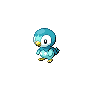

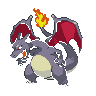

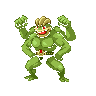

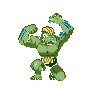

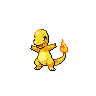

[{'sprite': None,
  'name': 'Pikachu',
  'ability': 'lightning-rod',
  'base_experience': 112,
  'hp_base_stat': 35,
  'attack_base_stat': 55,
  'def_base_stat': 40},
 {'sprite': None,
  'name': 'Bulbasaur',
  'ability': 'chlorophyll',
  'base_experience': 64,
  'hp_base_stat': 45,
  'attack_base_stat': 49,
  'def_base_stat': 49},
 {'sprite': None,
  'name': 'Piplup',
  'ability': 'defiant',
  'base_experience': 63,
  'hp_base_stat': 53,
  'attack_base_stat': 51,
  'def_base_stat': 53},
 {'sprite': None,
  'name': 'Charizard',
  'ability': 'solar-power',
  'base_experience': 267,
  'hp_base_stat': 78,
  'attack_base_stat': 84,
  'def_base_stat': 78},
 {'sprite': None,
  'name': 'Machamp',
  'ability': 'no-guard',
  'base_experience': 253,
  'hp_base_stat': 90,
  'attack_base_stat': 130,
  'def_base_stat': 80},
 {'sprite': None,
  'name': 'Machoke',
  'ability': 'no-guard',
  'base_experience': 142,
  'hp_base_stat': 80,
  'attack_base_stat': 100,
  'def_base_stat': 70},
 {'sprite': Non

In [23]:
pokeball()
pokeball()
pokeball()
pokeball()
pokeball()
my_team

### Problem 2:

I want to build the best Pokemon team I can and I need your help to do so! Using the API, build me a team of 6 pokemon who's base-stats are above 60. Return any additional information you think is needed to help understand why you chose that pokemon for the team!

In [4]:
response = requests.get('https://pokeapi.co/api/v2/pokemon?limit=100000&offset=0')
response.json()
poke_dict = response.json()["results"]
def champions():
    best_team = []
    for pokemon in range(len(poke_dict)):
        poke_name = poke_dict[pokemon]['name']
        stat_sheet = requests.get(poke_dict[pokemon]['url'])
        for stat in range(len(stat_sheet.json()['stats'])):
            if (stat_sheet.json()['stats'][stat]['base_stat'])>60:
                if poke_name not in best_team:
                    best_team.append(poke_name)
        if len(best_team) == 6:
            return best_team
            break
        
                      

champions()
        


['bulbasaur', 'ivysaur', 'venusaur', 'charmander', 'charmeleon', 'charizard']

In [88]:
value = poke_dict[1]['url']
value = requests.get(value)
value.json()['stats'][1]['base_stat']
len(value.json()['stats'])
for x in range(len(value.json()['stats'])):
    if value.json()['stats'][x]['base_stat']>60:
        (value.json()['stats'][x]['base_stat'])

poke_dict[1]['name']


'ivysaur'

### Problem 3:

Create a function that does the following:
* Input: pokemon_name(user_defined) -> str
* Output: list object containing a dictionary of values from the response object.
* Please include the type, the most current raritey level, at least one held item, and all stats

In [6]:
def get_pokemon_info(pokemon_name):
    url = f"https://pokeapi.co/api/v2/pokemon/{pokemon_name}/"
    response = requests.get(url)

    if response.status_code == 200:
        pokemon_data = response.json()
        
        types = [type_info['type']['name'] for type_info in pokemon_data['types']]
        
        rarity_level = "N/A"
        if pokemon_data['held_items']:
            rarity_level = pokemon_data['held_items'][0]['rarity']
        
        held_item = "None"
        if pokemon_data['held_items']:
            held_item = pokemon_data['held_items'][0]['item']['name']
        
        stats = {stat['stat']['name']: stat['base_stat'] for stat in pokemon_data['stats']}

        pokemon_info = {
            "Name": pokemon_data['name'],
            "Types": types,
            "Rarity Level": rarity_level,
            "Held Item": held_item,
            "Stats": stats
        }
        
        return [pokemon_info]
    else:
        print(f"Failed to fetch data for {pokemon_name}.")
        return []

pokemon_name = input("Enter the name of a Pokemon: ")

pokemon_info_list = get_pokemon_info(pokemon_name)

if pokemon_info_list:
    print(pokemon_info_list)


[{'Name': 'piplup', 'Types': ['water'], 'Rarity Level': 'N/A', 'Held Item': 'None', 'Stats': {'hp': 53, 'attack': 51, 'defense': 53, 'special-attack': 61, 'special-defense': 56, 'speed': 40}}]


In [ ]:
response.json()

In [132]:
response = requests.get('https://pokeapi.co/api/v2/pokemon?limit=100000&offset=0')
test = requests.get(response.json()['results'][100]['url']).json()['held_items']
test

[]